# WeatherPy

### Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate Cities List by Using the Citipy Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [4]:
# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
pprint(query_url)


'https://api.openweathermap.org/data/2.5/weather?appid=9a0925e2a75f58a68fe61b32e6afcbc7&units=metric&q='


In [5]:
# Create endpoint URL with each city
city_url = requests.get(query_url + city)
city_weather = city_url.json()

# Ensuring URL works to obtain dataset and evaluating layout of data (i.e., dicts, lists)
pprint(city_weather)
type(city_weather)

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 41.1501, 'lon': -82.5499},
 'dt': 1675428539,
 'id': 5158275,
 'main': {'feels_like': -17.77,
          'grnd_level': 992,
          'humidity': 80,
          'pressure': 1030,
          'sea_level': 1030,
          'temp': -10.77,
          'temp_max': -9.62,
          'temp_min': -11.27},
 'name': 'Huron',
 'sys': {'country': 'US',
         'id': 2005279,
         'sunrise': 1675427964,
         'sunset': 1675464513,
         'type': 2},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 320, 'gust': 10.9, 'speed': 6.84}}


dict

In [6]:
# Trialling if code down below is pulling appropriate data from dataset
city_lat = city_weather['coord']['lat']
city_lat

41.1501

In [7]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(query_url + city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

#     Run an API request for each of the cities
    try:
#         Parse the JSON and retrieve data
        city_weather = city_url.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | davila
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | tlahualilo
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | batagay
Processing Record 11 of Set 1 | mondlo
Processing Record 12 of Set 1 | poum
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | komsomolskiy
Processing Record 15 of Set 1 | buffalo
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | vardo
Processing Record 18 of Set 1 | nurota
Processing Record 19 of Set 1 | tutoia
Processing Record 20 of Set 1 | ghazipur
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | leningradskiy
Processing Re

Processing Record 36 of Set 4 | tasiilaq
Processing Record 37 of Set 4 | ponta do sol
Processing Record 38 of Set 4 | jiangyou
Processing Record 39 of Set 4 | puerto madryn
Processing Record 40 of Set 4 | gornoye loo
Processing Record 41 of Set 4 | mpika
Processing Record 42 of Set 4 | arcata
Processing Record 43 of Set 4 | dieppe
Processing Record 44 of Set 4 | mareeba
Processing Record 45 of Set 4 | hithadhoo
Processing Record 46 of Set 4 | naryan-mar
Processing Record 47 of Set 4 | joshimath
Processing Record 48 of Set 4 | saint anthony
Processing Record 49 of Set 4 | santa cruz
Processing Record 0 of Set 5 | vrangel
Processing Record 1 of Set 5 | baiyin
Processing Record 2 of Set 5 | fortuna
Processing Record 3 of Set 5 | vaini
Processing Record 4 of Set 5 | cordoba
Processing Record 5 of Set 5 | codrington
Processing Record 6 of Set 5 | chingirlau
Processing Record 7 of Set 5 | kalamnuri
Processing Record 8 of Set 5 | havre-saint-pierre
Processing Record 9 of Set 5 | puteyets
Proc

Processing Record 28 of Set 8 | itoman
Processing Record 29 of Set 8 | hamilton
Processing Record 30 of Set 8 | conceicao do araguaia
Processing Record 31 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 32 of Set 8 | chuy
Processing Record 33 of Set 8 | progreso
Processing Record 34 of Set 8 | havelock
Processing Record 35 of Set 8 | sisophon
Processing Record 36 of Set 8 | mugango
Processing Record 37 of Set 8 | banjar
Processing Record 38 of Set 8 | abha
Processing Record 39 of Set 8 | nadym
Processing Record 40 of Set 8 | hun
Processing Record 41 of Set 8 | san rafael del sur
Processing Record 42 of Set 8 | lakes entrance
Processing Record 43 of Set 8 | makat
Processing Record 44 of Set 8 | strezhevoy
Processing Record 45 of Set 8 | constitucion
Processing Record 46 of Set 8 | golden
Processing Record 47 of Set 8 | brazzaville
Processing Record 48 of Set 8 | sultepec
Processing Record 49 of Set 8 | qibili
City not found. Skipping...
Processing Record 0 of Set 9 | s

Processing Record 16 of Set 12 | urengoy
Processing Record 17 of Set 12 | tra vinh
Processing Record 18 of Set 12 | onega
Processing Record 19 of Set 12 | samarai
Processing Record 20 of Set 12 | dubbo
Processing Record 21 of Set 12 | touros
Processing Record 22 of Set 12 | severnoye
Processing Record 23 of Set 12 | krasnokamensk
Processing Record 24 of Set 12 | vung tau
Processing Record 25 of Set 12 | konstantinovka
Processing Record 26 of Set 12 | biak
Processing Record 27 of Set 12 | sabzevar
Processing Record 28 of Set 12 | xianyang
Processing Record 29 of Set 12 | aklavik
Processing Record 30 of Set 12 | paradwip
City not found. Skipping...
Processing Record 31 of Set 12 | fukuma
Processing Record 32 of Set 12 | axim
Processing Record 33 of Set 12 | mantua
Processing Record 34 of Set 12 | guaimaca
Processing Record 35 of Set 12 | burnie
Processing Record 36 of Set 12 | plettenberg bay
Processing Record 37 of Set 12 | yeppoon
Processing Record 38 of Set 12 | yarada
Processing Reco

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,davila,18.4726,120.5763,26.99,82,3,9.07,PH,1675428616
1,hermanus,-34.4187,19.2345,28.78,57,0,8.41,ZA,1675428616
2,qaanaaq,77.4840,-69.3632,-20.18,62,84,3.62,GL,1675428617
3,mataura,-46.1927,168.8643,16.37,98,100,1.38,NZ,1675428618
4,rikitea,-23.1203,-134.9692,25.51,70,47,3.90,PF,1675428620


In [10]:
# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


## Create the Scatter Plots Requested

### Latitude Vs. Temperature

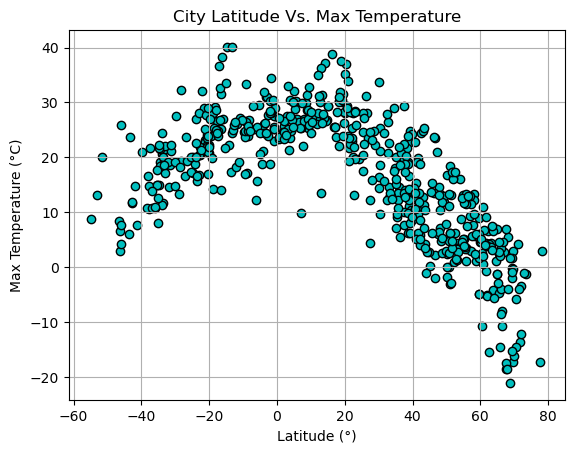

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",edgecolors= "black",color="c")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature")
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude (°)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1_Lat_MaxTemp.png")

# Show plot
plt.show()

### Latitude Vs. Humidity

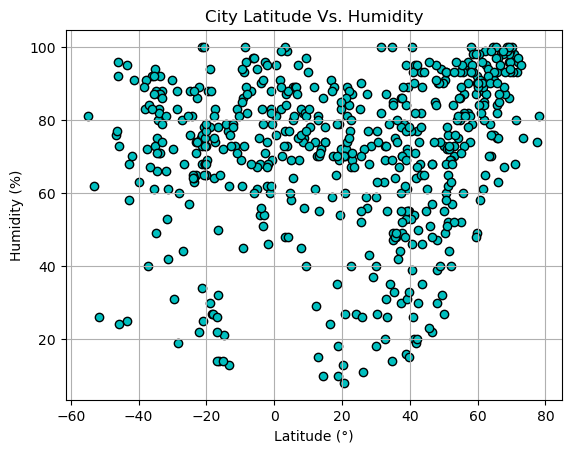

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",edgecolors= "black",color="c")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (°)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2_Lat_Humidity.png")

# Show plot
plt.show()

### Latitude Vs. Cloudiness

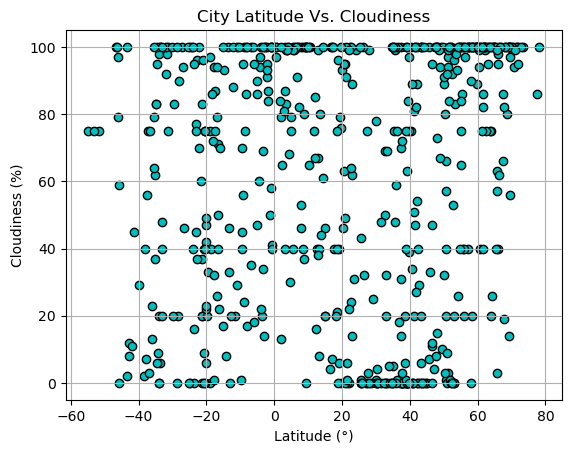

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",edgecolors= "black",color="c")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (°)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3_Lat_Cloudiness.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

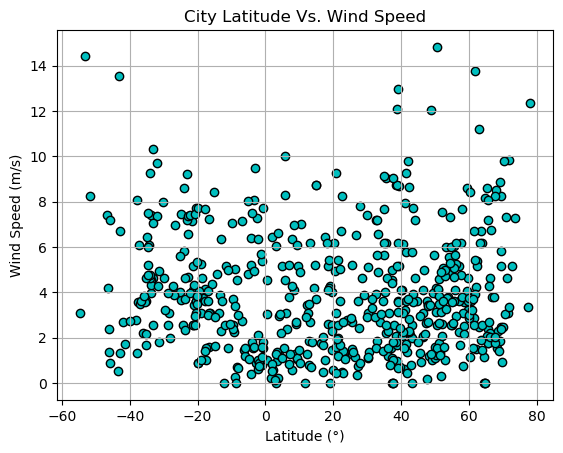

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o',edgecolors= "black",color="c")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude (°)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4_Lat_WindSpeed.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship 

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


### Latitude Vs. Temperature Linear Regression Plot 

The r-value is: 0.7161472181434118


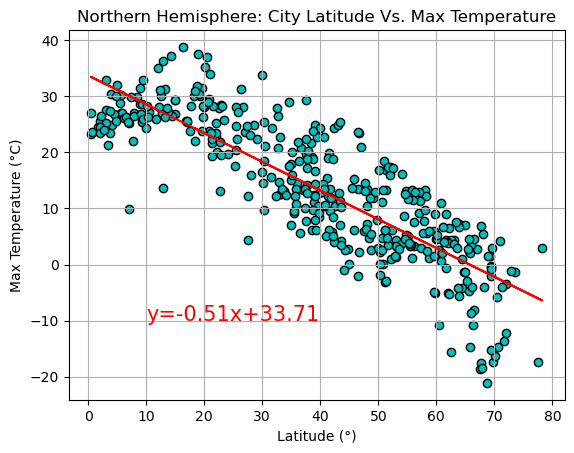

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope,intercept,rvalue,pvalue,stdderr) = linregress(x_values, y_values)

# Get regression values
regress_val = x_values * slope + intercept

# Create line equation string
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"

r_val = rvalue**2
print(f"The r-value is: {r_val}")

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o",edgecolors= "black",color="c")
plt.annotate(line_eq,xy=(10,-10),fontsize=15,color="red")
plt.plot(x_values,regress_val,"r-")

# Incorporate the other graph properties
plt.title("Northern Hemisphere: City Latitude Vs. Max Temperature")
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude (°)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig5_NH_Lat_MaxTemp.png")

# Show plot
plt.show()

The r-value is: 0.4121057168607245


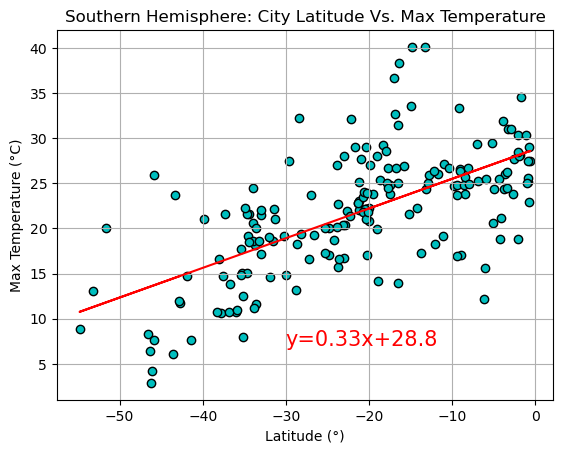

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope,intercept,rvalue,pvalue,stdderr) = linregress(x_values, y_values)

# Get regression values
regress_val = x_values * slope + intercept

# Create line equation string
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"

r_val = rvalue**2
print(f"The r-value is: {r_val}")

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o",edgecolors= "black",color="c")
plt.annotate(line_eq,xy=(-30,7),fontsize=15,color="red")
plt.plot(x_values,regress_val,"r-")

# Incorporate the other graph properties
plt.title("Southern Hemisphere: City Latitude Vs. Max Temperature")
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude (°)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig6_SH_Lat_MaxTemp.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

For the Northern Hemisphere, there is a strong negative correlation (r-value >0.7) between latitude and maximum temperature. This means that the farther north a city is from the equator, the lower the maximum temperature is. In other words, the farther north the city is, the colder the temperature. 

For the Southern Hemisphere, there is a weak positive correlation (r-value <0.5) between latitude and maximum temperature. The closer the city is to the equator, the higher the maximum temperature. 

When comparing both plots, there is more variance of the maximum temperature in the Southern Hemisphere in comparison to the Northern Hemisphere. 

### Latitude Vs. Humidity Linear Regression Plot 

The r-value is: 0.05689741545789598


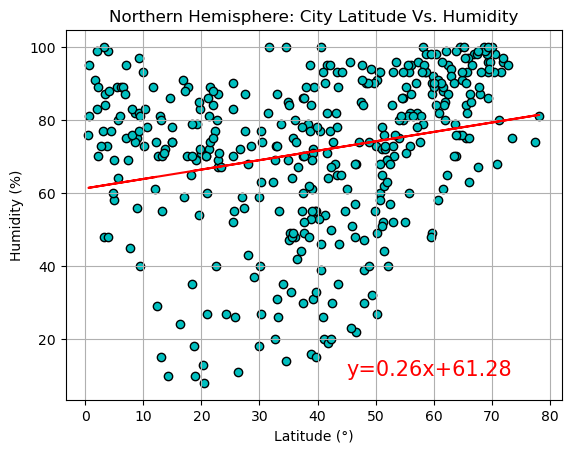

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope,intercept,rvalue,pvalue,stdderr) = linregress(x_values, y_values)

# Get regression values
regress_val = x_values * slope + intercept

# Create line equation string
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"

r_val = rvalue**2
print(f"The r-value is: {r_val}")

# Build scatter plot for latitude vs. humidity
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o",edgecolors= "black",color="c")
plt.annotate(line_eq,xy=(45,10),fontsize=15,color="red")
plt.plot(x_values,regress_val,"r-")

# Incorporate the other graph properties
plt.title("Northern Hemisphere: City Latitude Vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (°)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig7_NH_Lat_Humidity.png")

# Show plot
plt.show()

The r-value is: 0.0002808747046324607


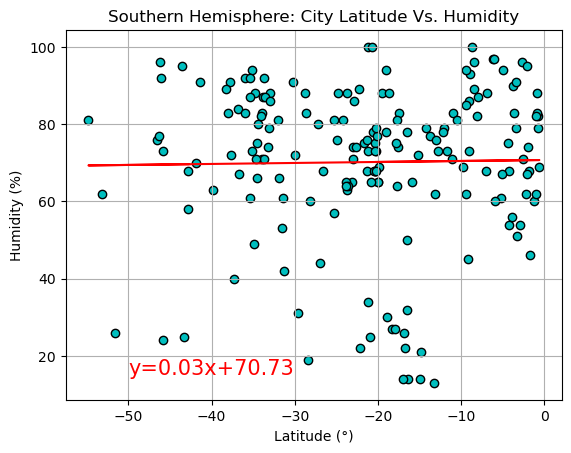

In [41]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope,intercept,rvalue,pvalue,stdderr) = linregress(x_values, y_values)

# Get regression values
regress_val = x_values * slope + intercept

# Create line equation string
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"

r_val = rvalue**2
print(f"The r-value is: {r_val}")

# Build scatter plot for latitude vs. humidity
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o",edgecolors= "black",color="c")
plt.annotate(line_eq,xy=(-50,15),fontsize=15,color="red")
plt.plot(x_values,regress_val,"r-")

# Incorporate the other graph properties
plt.title("Southern Hemisphere: City Latitude Vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (°)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig8_SH_Lat_Humidity.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

In both the Northern and Southern Hemisphere, there is almost no correlation (r-value <0.3) between the city latitude (position) and humidity level. As the cities move closer to the equator, in both the Northern and Southern Hemisphere, the humiditiy levels are higher.

### Latitude Vs. Cloudiness Linear Regression Plot 

The r-value is: 0.024026517125811015


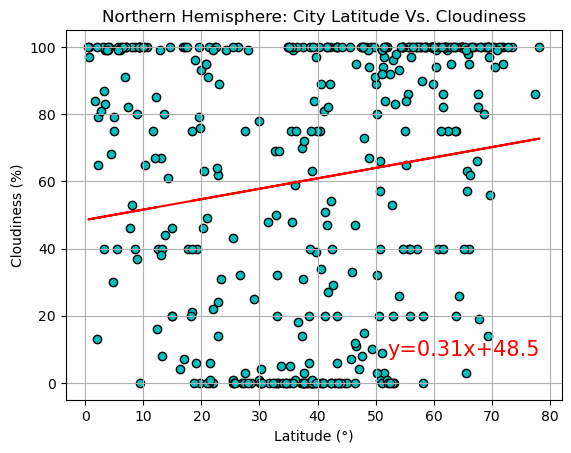

In [51]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope,intercept,rvalue,pvalue,stdderr) = linregress(x_values, y_values)

# Get regression values
regress_val = x_values * slope + intercept

# Create line equation string
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"

r_val = rvalue**2
print(f"The r-value is: {r_val}")

# Build scatter plot for latitude vs. cloudiness
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o",edgecolors= "black",color="c")
plt.annotate(line_eq,xy=(52,8),fontsize=15,color="red")
plt.plot(x_values,regress_val,"r-")

# Incorporate the other graph properties
plt.title("Northern Hemisphere: City Latitude Vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (°)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig9_NH_Lat_Cloudiness.png")

# Show plot
plt.show()

The r-value is: 0.02056735429994368


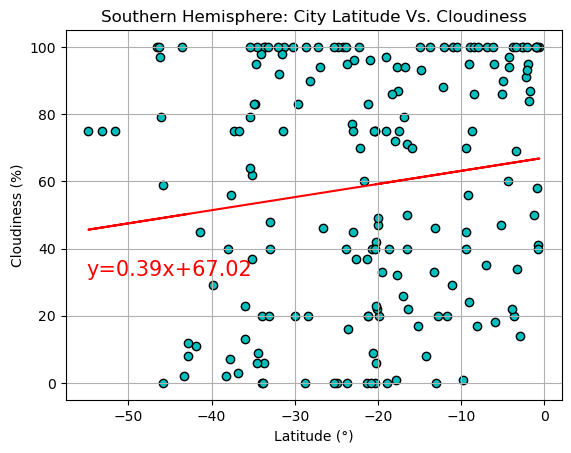

In [46]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope,intercept,rvalue,pvalue,stdderr) = linregress(x_values, y_values)

# Get regression values
regress_val = x_values * slope + intercept

# Create line equation string
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"

r_val = rvalue**2
print(f"The r-value is: {r_val}")

# Build scatter plot for latitude vs. cloudiness
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o",edgecolors= "black",color="c")
plt.annotate(line_eq,xy=(-55,32),fontsize=15,color="red")
plt.plot(x_values,regress_val,"r-")

# Incorporate the other graph properties
plt.title("Southern Hemisphere: City Latitude Vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (°)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig_10_SH_Lat_Cloudiness.png")

# Show plot
plt.show()

**Discussion about the linear relationship:**

In both the Northern and Southern Hemisphere, there is almost no correlation (r-value <0.3) between the city latitude (position) and cloudiness level. The cloudiness levels are vastly spread across all latitudes along both hemispheres, both ranging from 0% to 100%, independent of latitude. 

### Latitude vs. Wind Speed Linear Regression Plot

The r-value is: 0.030396762354449467


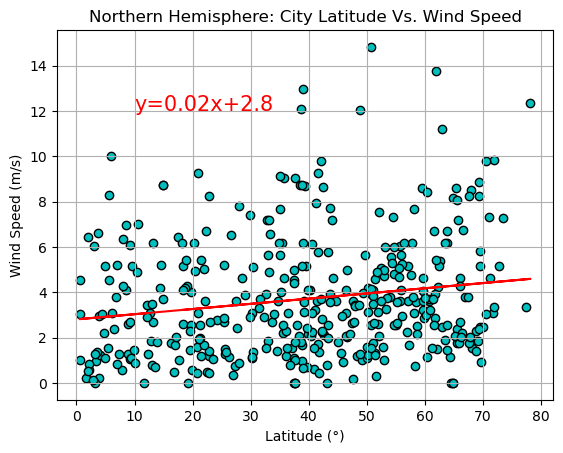

In [50]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope,intercept,rvalue,pvalue,stdderr) = linregress(x_values, y_values)

# Get regression values 
regress_val = x_values * slope + intercept

# Create line equation string
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"

r_val = rvalue**2
print(f"The r-value is: {r_val}")

# Build scatter plot for latitude vs. wind speed
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o",edgecolors= "black",color="c")
plt.annotate(line_eq,xy=(10,12),fontsize=15,color="red")
plt.plot(x_values,regress_val,"r-")

# Incorporate the other graph properties
plt.title("Northern Hemisphere: City Latitude Vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude (°)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig_11_NH_Lat_WindSpeed.png")

# Show plot
plt.show()

The r-value is: 0.062239040700515696


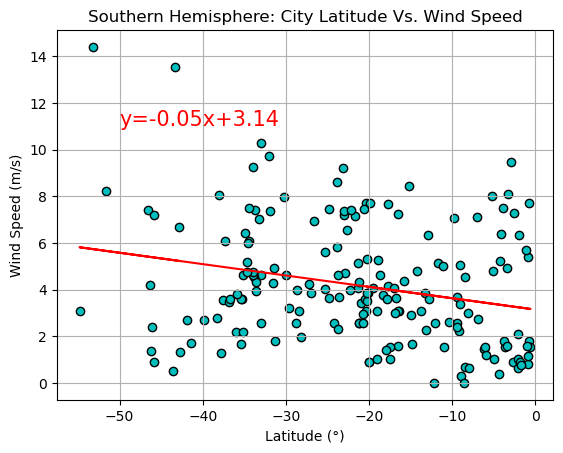

In [49]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope,intercept,rvalue,pvalue,stdderr) = linregress(x_values, y_values)

# Get regression values
regress_val = x_values * slope + intercept

# Create line equation string
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"

r_val = rvalue**2
print(f"The r-value is: {r_val}")

# Build scatter plot for latitude vs. wind speed
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o",edgecolors= "black",color="c")
plt.annotate(line_eq,xy=(-50,11),fontsize=15,color="red")
plt.plot(x_values,regress_val,"r-")

# Incorporate the other graph properties
plt.title("Southern Hemisphere: City Latitude Vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude (°)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig_12_SH_Lat_WindSpeed.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** 

In both the Northern and Southern Hemisphere, there is almost no correlation (r-value <0.3) between the city latitude (position) and wind speed. In the Northern Hemisphere, the data draws a very slight positive correlation, where in the Southern Hemisphere, there is a very slight negative correlation. In the Northern Hemisphere, wind speeds are vastly plotted between 0m/s and 6m/s, where the further from the equator you go, there is increased wind speed. As well, in the Southern Hemisphere, wind speeds are vastly plotted between 0m/s and 6m/s, where the closer to the equator you go, there is a decrease in wind speed. 